In [1]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import os
%matplotlib inline

In [2]:
data = pd.read_csv('Dataset/RawData/acc_exp01_user01.txt', sep=" ", header=None)
data.columns = ["x", "y", "z"]

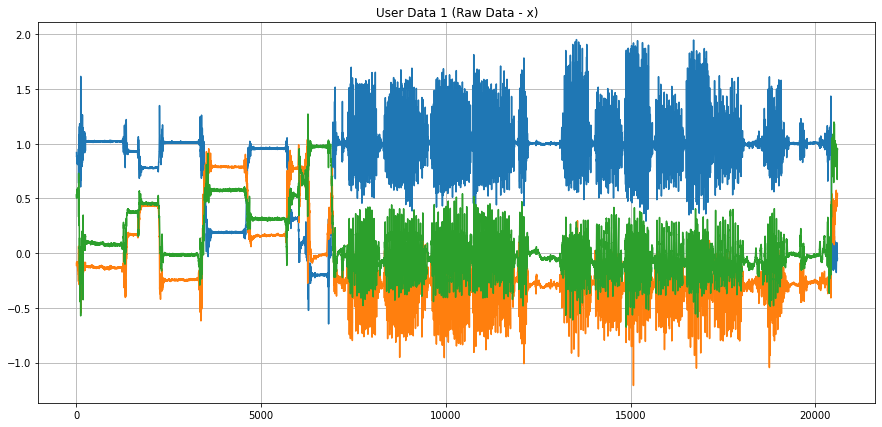

In [3]:
plt.figure(figsize=(15, 7))
plt.plot(data)
plt.title('User Data 1 (Raw Data - x)')
plt.grid(True)
plt.show()

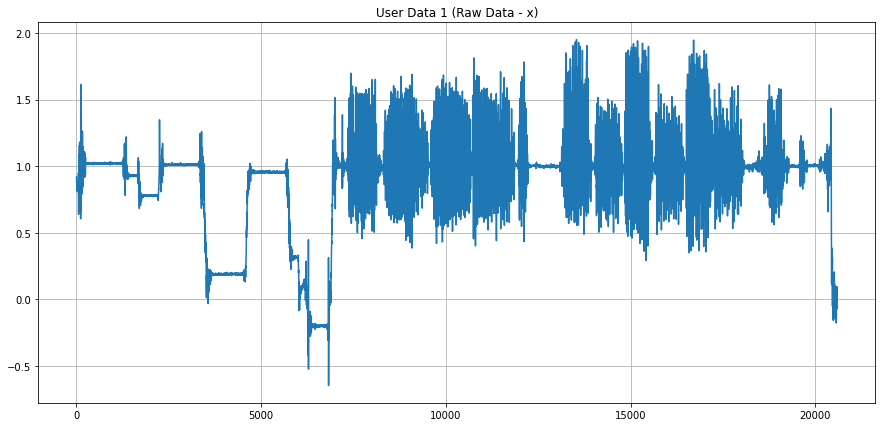

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(data['x'])
plt.title('User Data 1 (Raw Data - x)')
plt.grid(True)
plt.show()

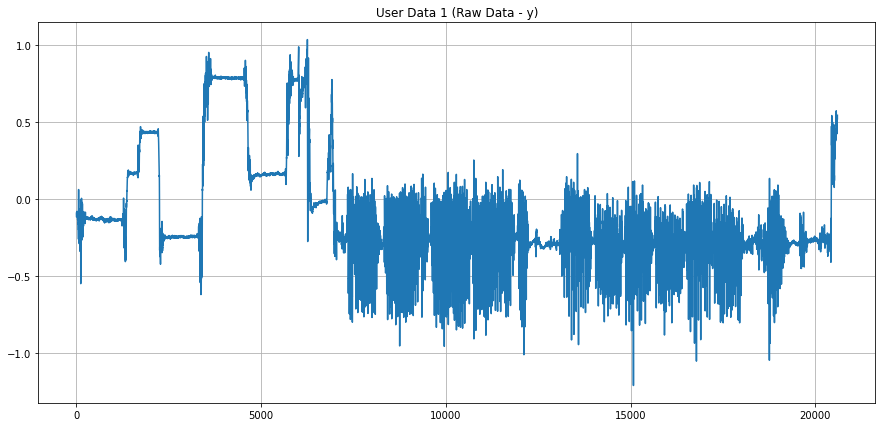

In [5]:
plt.figure(figsize=(15, 7))
plt.plot(data['y'])
plt.title('User Data 1 (Raw Data - y)')
plt.grid(True)
plt.show()

In [6]:
#Read the label activity from text file. we know the start and end point of the activity
label = pd.read_csv(os.getcwd()+'/Dataset/RawData/labels.txt', sep=" ", header=None)
label.columns = ["exp_id", "user_id", "activity_id","label_start","label_end"]

In [7]:
#Read the label categorical number
f = open(os.getcwd()+'/Dataset/activity_labels.txt','r').read()
act_dict = {}
i = 1
for _ in f.splitlines():
    v = _.strip().split(' ')[-1]
    act_dict[i] = v
    i += 1

In [8]:
# Get the index of the filename
index = ''
odd_index = ''
odd_i = 0
y_add_seq = []

for i in range(1, 22):
    #odd_i = (i*2)
    odd_i = i
    if i < 10:
        index = '0' + str(i)
    else:
        index = str(i)

    if odd_i < 10:
        odd_i = '0' + str(odd_i)
    else:
        odd_i = str(odd_i)
    
    odd_i_2 = int(odd_i)+1
    if odd_i_2 < 10:
        odd_i_2 = '0' + str(odd_i_2)
    else:
        odd_i_2 = str(odd_i)
    y_add_seq.append([odd_i,index])
    y_add_seq.append([odd_i_2,index])
for odd_i, index in y_add_seq:
    print(odd_i, index)

01 01
02 01
02 02
03 02
03 03
04 03
04 04
05 04
05 05
06 05
06 06
07 06
07 07
08 07
08 08
09 08
09 09
09 09
10 10
10 10
11 11
11 11
12 12
12 12
13 13
13 13
14 14
14 14
15 15
15 15
16 16
16 16
17 17
17 17
18 18
18 18
19 19
19 19
20 20
20 20
21 21
21 21


In [14]:
# CONFIGURE TRAIN OR TEST AT HERE !!!
train = 0
test = 1


# Get the the training data: 21 set
index = ''
odd_index = ''
odd_i = 0
y_add_seq = []


if train:
    start_i = 1
    end_i = 22
    mode = 'train'
elif test:
    start_i = 22
    end_i = 31
    mode = 'test'

for i in range(start_i, end_i):
    odd_i = (i*2)
    if i < 10:
        index = '0' + str(i)
    else:
        index = str(i)

    if odd_i < 10:
        odd_i = '0' + str(odd_i)
    else:
        odd_i = str(odd_i)

    y_add_seq.append([odd_i,index])


for odd_i, index in y_add_seq:
    data = pd.read_csv(os.getcwd()+'/Dataset/RawData/acc_exp{}_user{}.txt'.format(odd_i,index), sep=" ", header=None)
    data.columns = ["ax", "ay", "az"]

    gyro_data = pd.read_csv(os.getcwd()+'/Dataset/RawData/gyro_exp{}_user{}.txt'.format(odd_i,index), sep=" ", header=None)
    gyro_data.columns = ["gx", "gy", "gz"]
    
    data_point = []
    label_point = []
    gyro_point = []
    #ecombine all data of 1 user into 1
    for val in range(22):
        data_point = data[label['label_start'][val]:label['label_end'][val]]
        gyro_point = data[label['label_start'][val]:label['label_end'][val]]
        #data_point = np.insert(data_point, -1, values=, axis=1)

        for _ in range(len(data_point)):
            label_point.append(int(label['activity_id'][val]))
        data_point = np.c_[data_point, gyro_point]
        data_point = np.c_[data_point, label_point]
        # write to new data
        with open('{}data_combined.txt'.format(mode), "a+") as file:
            for row in data_point:
                file.write(" ".join(str(item) for item in row) + "\n")
                pass
            else:
                data_point = []
                label_point = []

[[ 0.9513889  -0.175      -0.02638889 ... -0.175      -0.02638889
   5.        ]
 [ 1.01666672 -0.26666668  0.03888889 ... -0.26666668  0.03888889
   5.        ]
 [ 1.01250004 -0.26805557  0.025      ... -0.26805557  0.025
   5.        ]
 ...
 [ 1.01527783 -0.17638889  0.07361111 ... -0.17638889  0.07361111
   5.        ]
 [ 1.01111115 -0.17916668  0.075      ... -0.17916668  0.075
   5.        ]
 [ 1.01111115 -0.17916668  0.075      ... -0.17916668  0.075
   5.        ]]
[[ 1.01250004 -0.17083334  0.08055556 ... -0.17083334  0.08055556
   7.        ]
 [ 1.01250004 -0.17083334  0.08055556 ... -0.17083334  0.08055556
   7.        ]
 [ 1.01527783 -0.17638889  0.06527778 ... -0.17638889  0.06527778
   7.        ]
 ...
 [ 1.01805561 -0.175       0.05833334 ... -0.175       0.05833334
   7.        ]
 [ 1.01805561 -0.175       0.05833334 ... -0.175       0.05833334
   7.        ]
 [ 1.01111115 -0.17638889  0.06527778 ... -0.17638889  0.06527778
   7.        ]]
[[ 1.00972226 -0.18055557  0.07

In [ ]:
for val in range(22):
    plt.figure(figsize=(15, 7))
    plt.plot(data[label['label_start'][val]:label['label_end'][val]], label=['x','y','z'])
    plt.title('User Data 1 (Activity: {})'.format(act_dict[(label['activity_id'][val])]))
    plt.grid(True)
    plt.show()

In [ ]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(data, 30) # prediction for the last observed day (past 24 hours)

In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [ ]:
plotMovingAverage(data['x'], 30) 